In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
LW=load_wine()
df_wine=pd.DataFrame(LW.data,columns=LW.feature_names)
df_wine['target']=LW.target
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


# Histograma

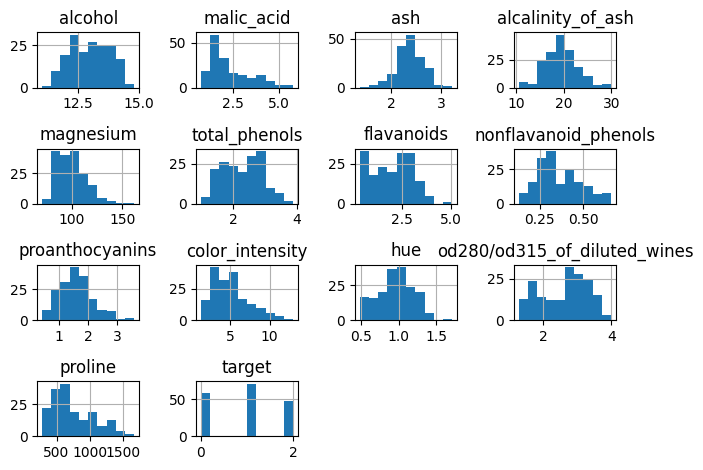

In [3]:
H=df_wine.hist()
plt.tight_layout()

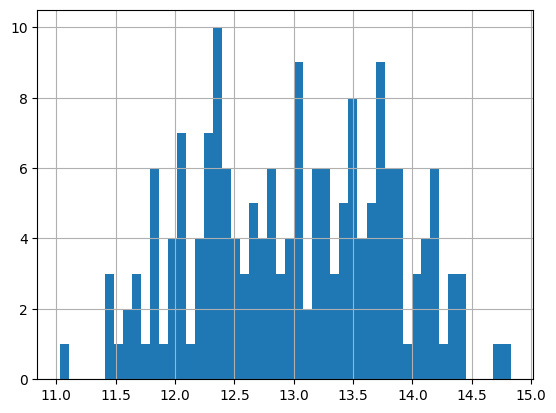

In [4]:
H=df_wine['alcohol'].hist(bins=50)

(array([ 1., 10., 19., 31., 21., 27., 25., 25., 17.,  2.]),
 array([11.03, 11.41, 11.79, 12.17, 12.55, 12.93, 13.31, 13.69, 14.07,
        14.45, 14.83]),
 <BarContainer object of 10 artists>)

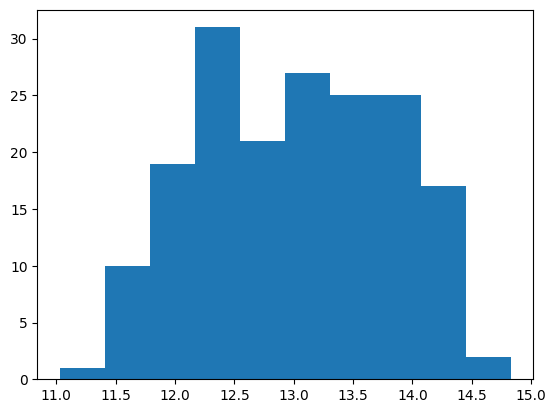

In [5]:
plt.hist(df_wine['alcohol']) # Regresa dos elementos: el primero de ellos, la tupla,
# son dos arreglos con la cantidad de elementos por contenedor y los límites de los contenedores

# Medidas de posición

In [6]:
#@title Media aritmética
df_wine.mean()

,0
alcohol,13.000618
malic_acid,2.336348
ash,2.366517
alcalinity_of_ash,19.494944
magnesium,99.741573
total_phenols,2.295112
flavanoids,2.029270
nonflavanoid_phenols,0.361854
proanthocyanins,1.590899
color_intensity,5.058090


In [7]:
import numpy as np

In [8]:
np.mean(df_wine,axis=0)

,0
alcohol,13.000618
malic_acid,2.336348
ash,2.366517
alcalinity_of_ash,19.494944
magnesium,99.741573
total_phenols,2.295112
flavanoids,2.029270
nonflavanoid_phenols,0.361854
proanthocyanins,1.590899
color_intensity,5.058090


In [9]:
#@title Media recortada
from scipy import stats

In [10]:
stats.trim_mean(df_wine['alcohol'],0.1) # Excluímos el 10% de los valores más pequeños y el 10% de los valores más grandes

13.006388888888889

In [11]:
stats.trim_mean(df_wine,0.1) # De forma predeterminada axis=0

array([1.30063889e+01, 2.21152778e+00, 2.37375000e+00, 1.94194444e+01,
       9.84444444e+01, 2.28576389e+00, 2.02020833e+00, 3.55069444e-01,
       1.56409722e+00, 4.82770833e+00, 9.58583333e-01, 2.63118056e+00,
       7.19298611e+02, 9.23611111e-01])

In [12]:
stats.tmean(df_wine['alcohol'],(11.5,14.5))

13.018488372093024

In [13]:
#@title Media ponderada
# df_wine['alcohol'].values
df_wine.shape

(178, 14)

In [14]:
W=np.ones(df_wine.shape[0]) # tenemos 178 unos
W[:3]=1.2 # Las primeras 3 observaciones las ponderamos a 1.2
np.average(df_wine['alcohol'],weights=W)

13.00239641657335

In [15]:
#@title Media geométrica y armónica
gm=stats.gmean(df_wine['alcohol']) # Media geométrica
hm=stats.hmean(df_wine['alcohol']) # Media armónica
print(df_wine['alcohol'].mean(),gm,hm) # Para valores positivos y diferentes de cero,
# la media aritmética es mayor a la media geométrica y ésta mayor a la armónica

13.00061797752809 12.975278352602606 12.949820740397147


In [16]:
#@title Mediana
df_wine['alcohol'].median()

13.05

In [17]:
np.median(df_wine['alcohol'])

13.05

In [18]:
#@title Moda
moda_pd=df_wine['alcohol'].mode()
moda_pd

,alcohol
0,12.37
1,13.05


In [19]:
moda_stats=stats.mode(df_wine['alcohol'])
moda_stats

ModeResult(mode=12.37, count=6)

In [20]:
moda_pd[0]

12.37

In [21]:
moda_stats[0]

12.37

In [22]:
#@title Cuantiles
df_wine['alcohol'].quantile(0.25)

12.362499999999999

In [23]:
df_wine['alcohol'].quantile((0.25,0.5,0.75))

,alcohol
0.25,12.3625
0.50,13.0500
0.75,13.6775


In [24]:
df_wine.quantile((0.25,0.5,0.75))

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0.25,12.3625,1.6025,2.2100,17.2,88.0,1.7425,1.205,0.2700,1.250,3.22,0.7825,1.9375,500.5,0.0
0.50,13.0500,1.8650,2.3600,19.5,98.0,2.3550,2.135,0.3400,1.555,4.69,0.9650,2.7800,673.5,1.0
0.75,13.6775,3.0825,2.5575,21.5,107.0,2.8000,2.875,0.4375,1.950,6.20,1.1200,3.1700,985.0,2.0


In [25]:
np.quantile(df_wine['alcohol'],(0.25,0.5,0.75))

array([12.3625, 13.05  , 13.6775])

In [26]:
np.quantile(df_wine,(0.25,0.5,0.75),axis=0)

array([[1.23625e+01, 1.60250e+00, 2.21000e+00, 1.72000e+01, 8.80000e+01,
        1.74250e+00, 1.20500e+00, 2.70000e-01, 1.25000e+00, 3.22000e+00,
        7.82500e-01, 1.93750e+00, 5.00500e+02, 0.00000e+00],
       [1.30500e+01, 1.86500e+00, 2.36000e+00, 1.95000e+01, 9.80000e+01,
        2.35500e+00, 2.13500e+00, 3.40000e-01, 1.55500e+00, 4.69000e+00,
        9.65000e-01, 2.78000e+00, 6.73500e+02, 1.00000e+00],
       [1.36775e+01, 3.08250e+00, 2.55750e+00, 2.15000e+01, 1.07000e+02,
        2.80000e+00, 2.87500e+00, 4.37500e-01, 1.95000e+00, 6.20000e+00,
        1.12000e+00, 3.17000e+00, 9.85000e+02, 2.00000e+00]])

# Medidas de dispersión

In [27]:
# 'Ctrl'+'F9' para ejecutar toho
#
#@title Desviación estándar y varianza
np.std(df_wine['alcohol'])             # STD poblacional

0.809542914528517

In [28]:
np.var(df_wine.alcohol)                # Varianza poblacional

0.6553597304633259

In [29]:
df_wine.alcohol.std()                  # STD muestral

0.8118265380058577

In [30]:
df_wine.alcohol.var()                  # Varianza muestral

0.6590623278105763

In [31]:
np.std(df_wine.alcohol,ddof=1)         # STD muestral

0.8118265380058577

In [32]:
df_wine.alcohol.std(ddof=0)             # STD poblacional

0.809542914528517

In [33]:
# df_wine.alcohol.var?  # ddof -> Delta Degrees of Freedom

In [34]:
#@title Rango
np.ptp(df_wine['alcohol'])

3.8000000000000007

In [35]:
np.max(df_wine['alcohol'])-np.min(df_wine['alcohol'])

3.8000000000000007

In [36]:
df_wine.alcohol.max()-df_wine.alcohol.min()

3.8000000000000007

In [37]:
#@title Rango intercuartílico
stats.iqr(df_wine['alcohol'])

1.3150000000000013

In [38]:
stats.iqr(df_wine,axis=0)

array([1.3150e+00, 1.4800e+00, 3.4750e-01, 4.3000e+00, 1.9000e+01,
       1.0575e+00, 1.6700e+00, 1.6750e-01, 7.0000e-01, 2.9800e+00,
       3.3750e-01, 1.2325e+00, 4.8450e+02, 2.0000e+00])

In [39]:
# Ahora desde pandas
df_wine.alcohol.quantile(0.75)-df_wine.alcohol.quantile(0.25)

1.3150000000000013

In [40]:
df_wine.quantile(0.75)-df_wine.quantile(0.25)

,0
alcohol,1.3150
malic_acid,1.4800
ash,0.3475
alcalinity_of_ash,4.3000
magnesium,19.0000
total_phenols,1.0575
flavanoids,1.6700
nonflavanoid_phenols,0.1675
proanthocyanins,0.7000
color_intensity,2.9800


In [41]:
# Desde numpy
np.percentile(df_wine['alcohol'],75)-np.percentile(df_wine['alcohol'],25)

1.3150000000000013

In [42]:
np.quantile(df_wine,0.75,axis=0)-np.quantile(df_wine,0.25,axis=0)

array([1.3150e+00, 1.4800e+00, 3.4750e-01, 4.3000e+00, 1.9000e+01,
       1.0575e+00, 1.6700e+00, 1.6750e-01, 7.0000e-01, 2.9800e+00,
       3.3750e-01, 1.2325e+00, 4.8450e+02, 2.0000e+00])

In [43]:
#@title Coeficiente de variación (Pearson)
stats.variation(df_wine.alcohol)  # std/|mean|

0.062269571794804905

In [45]:
df_wine.alcohol.std(ddof=0)/abs(df_wine.alcohol.mean())

0.062269571794804926

In [46]:
stats.variation(df_wine)

array([0.06226957, 0.47681402, 0.11560124, 0.17082223, 0.14279209,
       0.27192157, 0.4908411 , 0.34296507, 0.35875872, 0.45704302,
       0.23805811, 0.27108673, 0.42043713, 0.82376147])

In [47]:
df_wine.std(ddof=0)/np.abs(df_wine.mean()) # Usar 'abs' de 'numpy'

,0
alcohol,0.062270
malic_acid,0.476814
ash,0.115601
alcalinity_of_ash,0.170822
magnesium,0.142792
total_phenols,0.271922
flavanoids,0.490841
nonflavanoid_phenols,0.342965
proanthocyanins,0.358759
color_intensity,0.457043


# Medidas de forma

In [48]:
#@title Coeficiente de Fisher (sesgo)
df_wine.skew()

,0
alcohol,-0.051482
malic_acid,1.039651
ash,-0.176699
alcalinity_of_ash,0.213047
magnesium,1.098191
total_phenols,0.086639
flavanoids,0.025344
nonflavanoid_phenols,0.450151
proanthocyanins,0.517137
color_intensity,0.868585


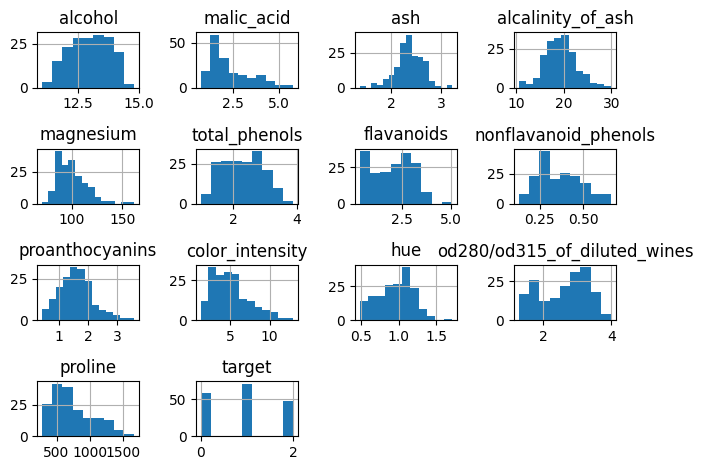

In [49]:
df_wine.hist(bins='auto')
plt.tight_layout()

In [50]:
#@title Curtósis
# Solo para variables simétricas  ;)
df_wine.kurtosis() # df_wine.kurt()

,0
alcohol,-0.852500
malic_acid,0.299207
ash,1.143978
alcalinity_of_ash,0.487942
magnesium,2.104991
total_phenols,-0.835627
flavanoids,-0.880382
nonflavanoid_phenols,-0.637191
proanthocyanins,0.554649
color_intensity,0.381522
